dBV -47.0 -21.0
a 0.0044668359215096305 0.08912509381337455
b 1642.2903271498456 32768.0
c 2.719882013347612e-06
data50 [ 221  226  226  227  231  223  228  218  219  213  207  211  203  197
  183  179  163  160  145  130  118  103   96   78   70   48   39   29
   11   -1  -12  -18  -38  -42  -67  -79  -90 -107 -113 -123 -135 -144
 -153 -167 -172 -179 -181 -190 -191 -197] 8192 247
T 0.18575963718820862
dv 5.38330078125
t 0.0 0.18573696145124716 8192


<IPython.core.display.Javascript object>


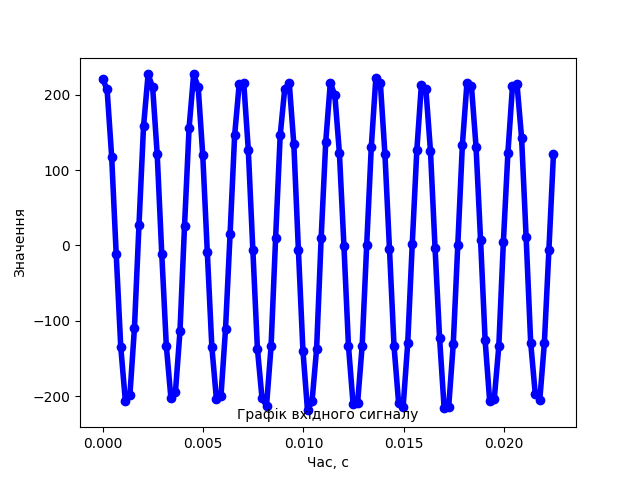

dataС50 [ 6.01093925e-04  6.14693335e-04  6.14693335e-04  6.17413217e-04
  6.28292745e-04  6.06533689e-04  6.20133099e-04  5.92934279e-04
  5.95654161e-04  5.79334869e-04  5.63015577e-04  5.73895105e-04
  5.52136049e-04  5.35816757e-04  4.97738408e-04  4.86858880e-04
  4.43340768e-04  4.35181122e-04  3.94382892e-04  3.53584662e-04
  3.20946078e-04  2.80147847e-04  2.61108673e-04  2.12150797e-04
  1.90391741e-04  1.30554337e-04  1.06075399e-04  7.88765784e-05
  2.99187021e-05 -2.71988201e-06 -3.26385842e-05 -4.89578762e-05
 -1.03355517e-04 -1.14235045e-04 -1.82232095e-04 -2.14870679e-04
 -2.44789381e-04 -2.91027375e-04 -3.07346668e-04 -3.34545488e-04
 -3.67184072e-04 -3.91663010e-04 -4.16141948e-04 -4.54220296e-04
 -4.67819706e-04 -4.86858880e-04 -4.92298644e-04 -5.16777583e-04
 -5.19497465e-04 -5.35816757e-04] 8192 0.0006718108572968601


<IPython.core.display.Javascript object>


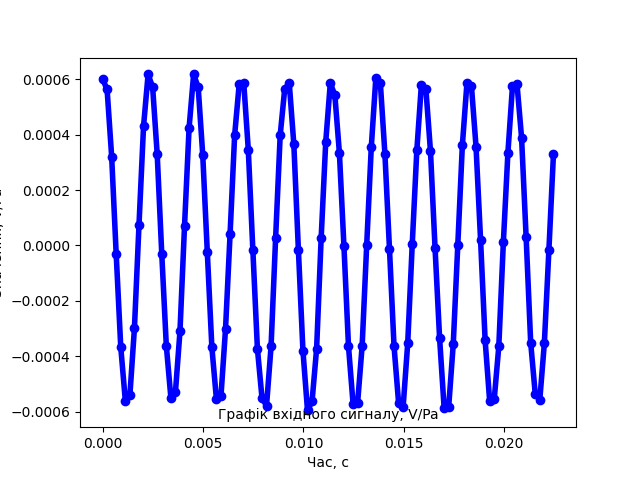

--- 0.0009989738464355469 seconds fft---
y_1_50 [ 0.04634407-0.j         -0.09861597-0.0222823j   0.00406836-0.05045841j
 -0.01834357-0.03126553j  0.01735849-0.00979798j  0.00558285+0.00010006j
 -0.01451329-0.01356399j  0.00911593+0.01103497j  0.00113298-0.01482194j
 -0.00694609-0.00941624j -0.00811492-0.01523368j -0.00785602-0.00371535j
 -0.01008591-0.00112062j -0.00197567-0.00308759j -0.00723539-0.0059731j
 -0.007869  -0.00168186j -0.00738898-0.00353191j -0.0138304 -0.00041809j
 -0.00684469-0.00040965j -0.00569195-0.0054291j  -0.00501782+0.00219303j
 -0.01276869-0.00385342j -0.00246089-0.00383476j -0.01115829+0.00014489j
 -0.01024189+0.00166222j -0.00651002+0.00218422j -0.00812467+0.00319079j
 -0.0090028 +0.00147884j -0.01304991+0.00647546j -0.00403552+0.0033582j
 -0.01016361-0.00279755j -0.00649004+0.00253297j -0.01048629+0.00413083j
 -0.01186001+0.0089582j  -0.00877179-0.00178013j -0.01409284+0.00155565j
 -0.00437399+0.00896354j -0.00952982+0.00381709j -0.00957141+0.00215863j
 -0.0

<IPython.core.display.Javascript object>


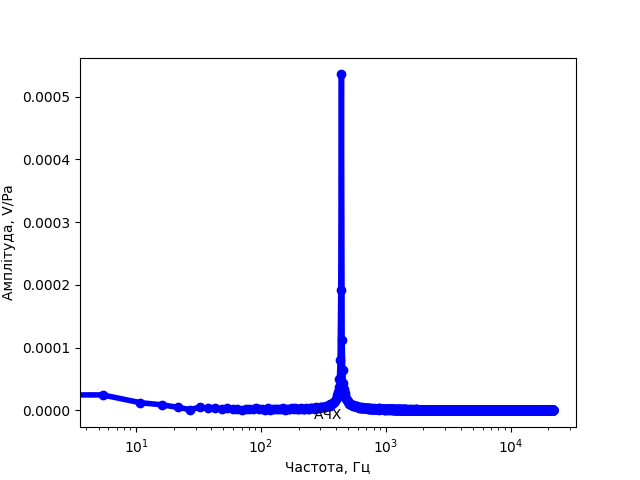

MaxVPa= 0.0005356579244243279 V/Pa
V_maxA= 441.4845562202417 Hz
MaxPa= 0.11991887184503852 Pa
dB -18.422249316634357 dB
MaxdBV= -65.42224931663435 dBV
MaxdB= 75.57775068336565 dB


In [1]:
# В РЕЖИМІ РЕАЛЬНОГО ЧАСУ
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError
import math

%matplotlib notebook
#inline

#20*LG[1Pa/20*10^(-6)Pa]=94 dB

#рівень звукового тиску (SPL) вхідного сигналу, dB
#рівень вихідного сигналу, dBV

#чутливість мікрофону - це напруга, яка виникає на виході мікрофона*, 
#коли на нього подати синусоїдальний сигнал частотою 1кГц і рівнем звукового тиску 94дБ**, 
#що відповідає тиску 1Па

#Більшість аналогових електретних мікрофонів мають чутливість у діапазоні від –46 до –35 дБ·В, 
#тому будемо вважати, що чутливість мікрофона -40 дБ·В   (-47)

#*мікрофон на відстані 1 метр від гучномовця
#**розмова, на відстані близько 3 см приблизно дорівнює гучності 94 dB
 
#120 dB (SPL) ---  (-21) dBV ---20       Pa ---89.13 mV/Pa --- 32768=2^15
# 94 dB (SPL) ---  (-47) dBV --- 1       Pa --- 4.47 mV/Pa ---  1642.29
#  0 dB (SPL) --- (-141) dBV --- 0.00002 Pa --- 0    mV/Pa ---     0

        
FORMAT = pyaudio.paInt16    #[-32768 ÷ 32767]=2^16   
CHANNELS = 1                
RATE = 44100
CHUNK = 8192  #2^13 
dev_index = 0

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    input_device_index = dev_index,
    frames_per_buffer=CHUNK
)

#корекція чутливості мікрофона
#розрахунок коефіцієнта перетворення

dBV = -47.0                #-47
dBV0 = dBV+(120-94)        #-21
print('dBV',dBV,dBV0)

a=np.power(10.0,dBV/20.0)   #4.47e-3
a0=np.power(10.0,dBV0/20.0) #89.13e-3
print('a',a,a0)

b0=np.power(2.0,15)        #32768
b=b0*a/a0                  #1642.29
print('b',b,b0)

c=a0/b0
print('c',c)

stream.start_stream()
data = np.frombuffer(stream.read(CHUNK),dtype=np.int16)
stream.stop_stream()
print('data50',data[:50],len(data), max(data))
fps=RATE
Z=CHUNK

#Z=int(fps*T)
T=Z/fps
print('T',T)
#крок частоти 
dv=1/T
print('dv',dv)
#основний тон
#t0=int(fps/v)

dT=1/fps
# вісь часу
t=np.arange(Z)*dT
print('t', t[0], t[-1], len(t))

#Залежність значень (16-бітне зчитування) вхідного сигналу від часу
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Графік вхідного сигналу', fontsize=10, x=0.5, y=0)
ax.set_xlabel('Час, с')
ax.set_ylabel('Значення')
ax.plot(t[:1000:10], data[:1000:10], color='blue', marker='o', label="Графік вх. сигналу, data", linewidth=4)


#перетворення бітів
#data-->V/Pa

data = data*c
print('dataС50',data[:50],len(data), max(data))
#Залежність значень (у V/Pa) вхідного сигналу від часу
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Графік вхідного сигналу, V/Pa', fontsize=10, x=0.5, y=0)
ax.set_xlabel('Час, с')
ax.set_ylabel('Значення, V/Pa')
ax.plot(t[:1000:10], data[:1000:10], color='blue', marker='o', label="Графік вх. сигналу data*c", linewidth=4)

#ДПФ
start = time.time()
y_1=fft(data)
end = time.time()
t_1=end - start
u="--- %s seconds fft---" % t_1
print("--- %s seconds fft---" % t_1)
print('y_1_50',y_1[:50],len(y_1), max(y_1))

#вісь частот
L=len(y_1)
x = np.linspace(0, int((L)/T), L)
print('L',L)
print('x',x[:50],x[-1], len(x))
y1=[]
for i in range(L):
    y1.append(abs(y_1[i])/(L/2))
print('y1_50',y1[:50],len(y1), max(y1))

#половина спектру
Z1=int(L/2)
print(Z1)

#АЧХ
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'АЧХ', fontsize=10, x=0.5, y=0)
ax.set_xlabel('Частота, Гц')
ax.set_ylabel('Амплітуда, V/Pa')
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.bar(x[:], y3[:])
ax.plot(x[:Z1], y1[:Z1], color='blue', marker='o', label="Графік АЧХ", linewidth=4)
MaxVPa=max(y1)
V_maxA=x[np.argmax(y1)]
print('MaxVPa=',MaxVPa,'V/Pa')
print('V_maxA=',V_maxA,'Hz')
MaxPa=MaxVPa*1/a
print('MaxPa=',MaxPa,'Pa')
dB=20*math.log10(MaxVPa/a)
print('dB',dB, 'dB')
MaxdBV=dB+dBV
print('MaxdBV=',MaxdBV,'dBV')
MaxdB=dB+94
print('MaxdB=',MaxdB,'dB')

    
    